---
## ESERCITAZIONE 1
---
### Esercizio 1.1.1 - Test della media di numeri pseudocasuali con distribuzione uniforme
Nel primo punto di questa esercitazione si vuole testare il generatore di numeri casuali fornito. Il primo approccio consiste nel generare numeri pseudocasuali con distribuzione uniforme. Verifico che siano "casuali" calcolandone la media e verificando che all'aumentare del numero di estrazioni questa tenda al valore atteso, calcolato come $\langle r \rangle = \int_0^1 r dr = 1/2$. I punti svolti in dettaglio sono qui riportati:$\\$

- Genero $M=10^5$ numeri pseudocasuali
- Li divido in $N=100$ blocchi da $L=10^3$ numeri per blocco.
- Per ogni blocco calcolo la media

In questo modo è possibile creare un plot della media cumulativa, con relativo errore, al variare del numero di blocchi preso in considerazione.

Importo le librerie necessarie e il file contenente la media cumulativa e relativo errore per ognuno dei $100$ blocchi.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Questa funzione di NumPy permette di caricare dei numeri scritti in colonne su file esterno.
# Devo specificare "unpack" per poter salvare le diverse colonne su variabili diverse,
# l'opzione "usecols" specifica quali colonne caricare,
# "skiprows" serve a saltare la prima riga, perché contiene delle stringhe che non sono caricabili
ave, err = np.loadtxt("./Dati_es1-1.txt", unpack= True, usecols=(0,1), skiprows=1)

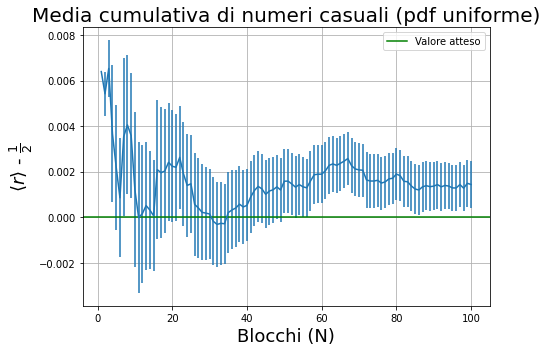

In [21]:
x = np.arange(1, N+1)   # [1,2,...,N] sarà l'asse x del plot e indica il numero di blocchi utilizzato per la cumulazione

plt.figure(figsize=(7, 5))
plt.title("Media cumulativa di numeri casuali (pdf uniforme)",fontsize=20)

plt.errorbar(x, ave-0.5,yerr=err) # plotto la media cumulativa, e relativo errore, a cui sottraggo il valore atteso

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle r \rangle$ - $\frac{1}{2}$", fontsize=18)

plt.axhline(y=0, xmin=0, xmax=1, color = 'green', label = "Valore atteso")

plt.legend()

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

Dai risultati ottenuti, dopo $10^5$ lanci divisi in $100$ blocchi, si ottiene $\langle r \rangle = 0.501 \pm 0.001
$

### Esercizio 1.1.2 - test della deviazione standard della media di numeri pseudocasuali con distribuzione uniforme
Analogamente al punto precedente, sempre considerando il calcolo cumulativo, verifico che la varianza di questi numeri tenda al valore atteso, calcolata come $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. $\\$

I dati sono (ovviamente) calcolati a partire dagli stessi numeri casuali utilizzati nell'analisi precedente.

In [15]:
# Importo nuovamente le librerie in modo che quando carico questo secondo file non devo compilare nuovamente anche sopra
import matplotlib.pyplot as plt
import numpy as np

ave2, err2 = np.loadtxt("./Dati_es1-2.txt", unpack= True, usecols=(0,1), skiprows=1)

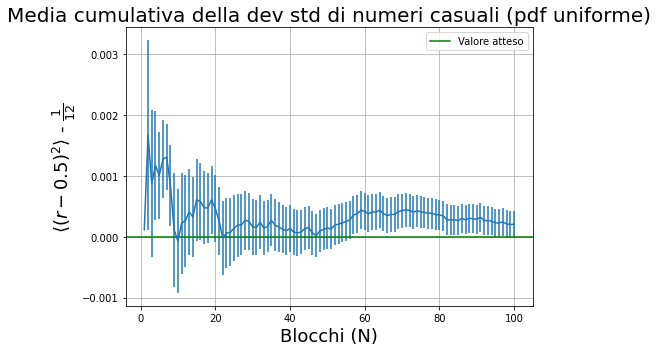

In [18]:
x = np.arange(1, N+1)   # [1,2,...,N] sarà l'asse x del plot e indica il numero di blocchi utilizzato per la cumulazione

plt.figure(figsize=(7, 5))
plt.title("Media cumulativa della dev std di numeri casuali (pdf uniforme)",fontsize=20)

plt.errorbar(x, ave2-1/12, yerr=err2) # plotto la media cumulativa, e relativo errore, a cui sottraggo il valore atteso

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle \left(r-0.5 \right)^{2} \rangle$ - $\frac{1}{12}$", fontsize=18)

plt.axhline(y=0, xmin=0, xmax=1, color = 'green', label = "Valore atteso")

plt.legend()

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

### Esercizio 1.1.3 - test del $\chi^{2}$
La terza analisi consiste nello stimare la probabilità che i dati pseudocasuali $non$ appartengano a una distribuzione uniforme. Se questa probabilità risulta essere bassa è possibile scartare l'ipotesi. $\\$
L'intervallo [0,1], range di estrazione dei numeri pseudo-casuali, viene diviso in $n_{bins}$ sottointervalli di uguale larghezza. Per l'ipotesi di uniformità della distribuzione, la probabilità che un numero estratto appartenga a uno qualsiasi tra questi sottointervalli dev'essere uguale. In questo modo si può quantificare la differenza tra il valore osservato $O_i$ (numeri caduti in un certo sottointervallo) e il valore atteso $E_i$. Per fare ciò si calcola il $\chi^2$ di Pearson, qui riportato: $\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$. $\\$
Nel nostro caso il numero di eventi atteso per ogni sottointervallo, data l'assunzione di distribuzione uniforme, è uguale e pari a $\dfrac{n_{throws}}{n_{bins}}$, con $n_{throws}$ il numero di lanci. $\\$

---
I CHI QUADRI SONO 10!!!

L'analisi è ancora (ovviamente) svolta per il dataset di numeri casuali generati in precedenza. La suddivisione in blocchi permette di stimare $N$ valori di $\chi^{2}$, uno per ognuno degli $N$ blocchi. Per ciascuno, il numero di eventi atteso in ogni sottointervallo sarà pari a $L = M/N$, ovvero il numero di estrazioni per blocco. $\\$

I seguenti punti riassumono l'analisi:$\\$
- Il dataset da analizzare è di $M=10^5$ numeri casuali divisi in $N=100$ blocchi da $L= numeri per blocco
- Divido l'intervallo [0,1] dei numeri casuali in $n_{bins}=100$ sottointervalli 
- Calcolo il chi quadro per ogni blocco, utilizzando $L/n_{bins}$ come numero di eventi $atteso$ per ogni sottointervallo e $n_i$ come numero di numeri casuali effettivamente presenti in ogni sottointervallo (che quindi devo contare)
- Ho una distribuzione di N valori di chi quadro che plotto, e il cui valore medio dev'essere $L/n_{bins} \simeq 100$

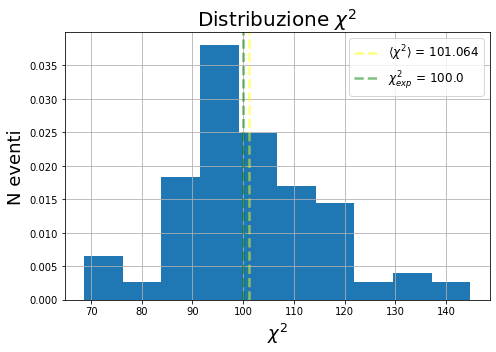

In [20]:
# Variabili già definite in precedenze ma le ridefinisco per poter runnare solo questa sezione invece di tutto il codice
M= len(r) # numero di numeri casuali
N=100 # numero di blocchi
L=int(M/N) # numero di numeri per blocco

n_bins = 100 # numero di bins in cui divido l'intervallo [0,1]

chi = [] # lista che conterrà i valori di chi quadro calcolati per ogni blocco

exp = int(L/n_bins) # valore aspettato di numeri casuali per ogni sottointervallo di [0,1]

# n_i è la lista che contiene il numero di valori osservato per ogni intervallino

for i in range(N): # per ogni blocco
    n_i,*useless=np.histogram(r[i*L:i*L+L], n_bins, (0,1)) # utilizzo la funzione histogram per contare il numero di eventi per ogni bins, ovvero intervallino
    chi.append(np.sum([(n-exp)**2/exp for n in n_i]))  # calcolo il chi quadro

media = np.mean(chi)

plt.figure(figsize=(7, 5))
plt.hist(chi, bins=10, density=True)

plt.axvline(media,label=r'$\leftangle \chi^{2} \rightangle$ = %.3f' %(media), color="yellow",alpha=0.5,ls='--', lw=2.5)
plt.axvline(100,label=r'$\chi^{2}_{exp}$ = %.1f' %(100), color="green",alpha=0.5,ls='--', lw=2.5)

plt.legend(loc='upper right', prop={'size': 12})

plt.title(r"Distribuzione $\chi^{2}$",fontsize=20)
plt.xlabel(r"$\chi^{2}$", fontsize=18)
plt.ylabel("N eventi", fontsize=18)

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

### Esercizio 1.2 - Distribuzioni di probabilità alternative
Utilizzo il metodo dell'inversa della cumulativa, in modo che utilizzo un numero casuale distribuito uniformemente tra 0 e 1 per ottenere un numero casuale distribuito con una certa distribuzione

In [5]:
import matplotlib.pyplot as plt
#import matplotlib
import math
import numpy as np
from scipy.stats import norm

# carico i dati di distribuzione standard, esponenziale e lorentziana
s, e, l= np.loadtxt("./number01.2.out", unpack= True, usecols=(0,1,2), skiprows=1)

In [21]:
# R è la distribuzione di numeri casuali da plottare,
# xlim sono i limiti (sx, dx) del grafico da plottare
# text è il titolo del grafico
def GraphPlotter(R, xlim, text):
        # Valori di S_N
    N = [100, 10, 2, 1]
    
    n_dati = int(1e4) #10^4 valori di S_N
    
    plt.figure(figsize=(7, 5))
    
    color = ['green', 'blue', 'yellow', 'red']
    for n,c in zip(N, color): # per ogni N degli S_N da fare
        S_N = [np.sum([R[j+i*n] for j in range(n)])/n for i in range(n_dati)]  #fissato N calcolo la lista di 10^4 valori
        h, bins, pathces = plt.hist(S_N, bins=np.linspace(*xlim, 100), density=True, color=c, alpha=1, label=f'N={n}')

        if n==100:
            mu, sigma = norm.fit(S_N)
            y = norm.pdf(bins, mu, sigma)
            plt.plot(bins, y, label = "Fit gaussiano", color='black')
            plt.plot(mu,0,linewidth=1, label=r'$\mu = %.2f $' %(mu), color="white")
            plt.plot(mu,0,linewidth=1, label=r'$\sigma = %.2f $' %(sigma), color="white")

    plt.legend(loc='upper right', prop={'size': 12})
    
    plt.title(text,fontsize=20)
    plt.xlabel(r"$S_N$", fontsize=18)
    plt.ylabel("N eventi", fontsize=18)
    
    plt.grid(True)
    plt.tight_layout() # per ridurre lo spazio bianco intorno
    # plt.savefig("Distribuzione_numeri casuali.pdf")
    plt.show()

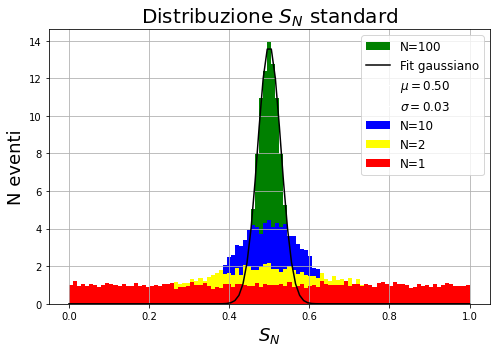

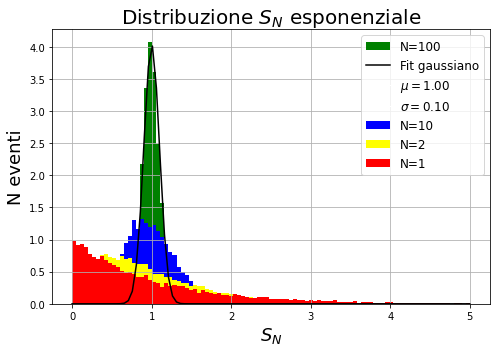

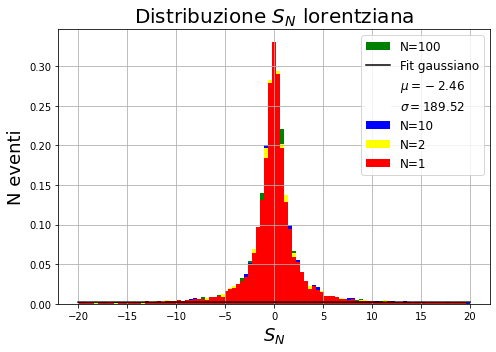

In [7]:
GraphPlotter(s, (0,1), "Distribuzione $S_N$ standard")
GraphPlotter(e, (0,5), "Distribuzione $S_N$ esponenziale")
GraphPlotter(l, (-20, 20), "Distribuzione $S_N$ lorentziana")

Si nota che nel primi due casi il teorema del limite centrale comporta che la distribuzione limite è una distribuzione gaussiana, nel secondo caso invece, proprio perché la distribuzione dei dati è lorentziana, la distribuzione limite è ancora una lorentziana. Si nota che si ha già per $N=1$ infatti i dati sono già distribuiti secondo una lorentziana.

### Esercizio 1.3 - Stima di $\pi$ con esperimento di Buffon
Si stima il valore di $\pi$ dai lanci di un ago di lunghezza $L$ su un insieme di linee equispaziate a distanza $d>L$. La probabilità che l'ago intersechi una delle linee è legata a $\pi$ dalla seguente relazione (con $P=\dfrac{n_{intersezioni}}{n_{lanci}}$):

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2 \cdot L \cdot N_{lanci}}{N_{int}\cdot d}$$

Nel sistema di riferimento considerato, le linee parallele sono orizzontali. Chiamo $x$ l'asse parallelo a queste linee e $y$ quello ortogonale a esse. $\\$
Il sistema è invariante per traslazioni lungo $x$ e simmetrico con periodo $d$ per traslazioni lungo $y$. Posso dunque considerare in modo equivalente che il sistema sia monodimensionale (guardo solo la direzione $y$) e che le linee siano solamente due. $\\$
Simulo i lanci casuali dell'ago generando un dataset di $10^5$ coppie di numeri. $\\$
Il primo rappresenta l'altezza $y$ del punto inferiore dell'ago rispetto alla linea inferiore (quindi si avrà $y \in [0,d]$), $\\$ 
mentre il secondo è l'angolo di inclinazione $\theta$ dell'ago rispetto all'asse parallelo alle linee ( $\theta \in [0, 2\pi)$). $\\$
La condizione di intersezione dell'ago con le linee si ha se: 
$$y+y_p \leq 0 \lor y+y_p \geq d$$
dove $y_p$ è la proiezione del punto superiore dell'ago sull'asse $y$, ovvero: $y_p = L\cdot\sin\theta$

Plotto quindi la stima di $\pi$ con deviazione std della media, al variare del numero di lanci e raggruppando i dati per blocchi

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# carico i dati dell'altezza y del punto inferiore dell'ago e del suo angolo d'inclinazione theta rispetto all'asse x
# OSS: l'angolo è in gradi
# OSS: y è in [0,1], quindi L < 1
y, theta = np.loadtxt("./number01.3.out", unpack= True, usecols=(0,1), skiprows=1)

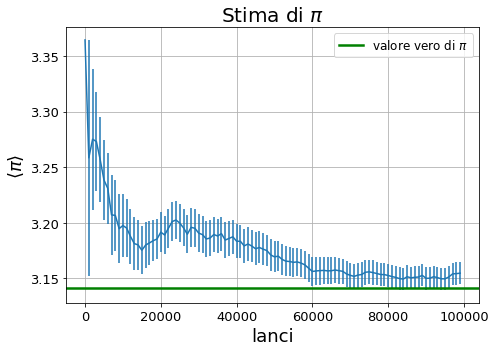

In [25]:
d = 1 # distanza tra le linee (ma dipende da come ho generato i dati casuali)
length = 0.9*d # lunghezza ago, calcolata come percentuale di d
M= len(y) # numero di numeri casuali
N=100 # numero di blocchi
L=int(M/N) # numero di lanci per blocco

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(N)      # [0,1,2,...,N-1]
x*=L # Numero di lanci = numero blocchi * Numero lanci per blocco

# funzione che calcola la deviazione standard della media a partire dalla media dei quadrati e dal quadrato della media
# in ingresso do' i due array delle quantità sopracitate ma cumulative, e l'indice n-esimo di cui calcolare la deviazione std
# questo corrisponde al calcolo di sigma dopo n blocchi
def error(AV,AV2,n): # sono array 
    if n==0:
        return 0
    else:
        return np.sqrt((AV2[n] - AV[n]**2)/n)

ave = np.zeros(N) # lista che conterrà la media cumulativa di pigreco al variare del numero N di blocchi utilizzato
av2 = np.zeros(N) # analogo ma contiene la media cumulativa al quadrato
sum_prog = np.zeros(N) # analogo ma è la somma cumulativa dei numeri casuali, per calcolo della dev std
su2_prog = np.zeros(N) # somma cumulativa dei quadrati dei numeri casuali, per calcolo della dev std
err_prog = np.zeros(N) # dev std cumulativa

# prima calcolo pi greco per ognuno degli N blocchi
for i in range(N): #per ogni blocco calcolo il valore d
    hit = 0
    for j in range(L): #per ogni numero casuale nel blocco
        k = j+i*L # k-esimo numero casuale dallo 0-esimo nello 0-esimo blocco ecc
        h = y[k] + length*np.sin(theta[k]/(2*np.pi)) # altezza dell'ago, uso il pi greco per la conversione in radianti :(

        if h <= 0 or h >= d:  # condizione d'intersezione con una delle due linee
            hit += 1 # conto un'intersezione in più

    ave[i] = (2*length*L)/(d*hit)     # valor medio di pi greco stimato nel blocco i
    av2[i] = (ave[i])**2 # (r_i)^2 quadrato della media di pi greco

# ora calcolo pi greco ma sommando in progressione il contributo di ogni blocco
for i in range(N): #per ogni blocco
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} pi_j , sommo tutte le medie di pigreco stimate fino al blocco i+1-esimo
        su2_prog[i] += av2[j] # SUM_{j=0,i} (pi_j)^2, sommo tutte le medie al quadrato dei pi greco stimati fino al blocco i+1-esimo
    sum_prog[i]/=(i+1) # calcolo la media cumulativa del valore di pi greco
    su2_prog[i]/=(i+1) # media dei quadrati cumulativa
    err_prog[i] = error(sum_prog,su2_prog,i) # Deviazione standard calcolata fino al blocco i-esimo
    
plt.figure(figsize=(7, 5))
plt.title("Stima di $\pi$",fontsize=20)

plt.errorbar(x,sum_prog,yerr=err_prog) #plotto la media cumulativa

plt.xlabel(r"lanci", fontsize=18)
plt.ylabel(r"$\langle \pi \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=np.pi, xmin=0, xmax=1, label=r'valore vero di $\pi$', lw = 2.5, color = 'green')

plt.legend(loc='upper right', prop={'size': 12})


plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Stima_pigreco.pdf")
plt.show()